In [1]:
import pandas as pd


In [2]:
df= pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=label_encoder.fit_transform(df['Marital.Status'])

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [6]:
df['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [9]:
df['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [10]:
df['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [11]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [12]:
import seaborn as sns 
#sns.pairplot(df)

In [13]:
Tax_income =[]
for i in df['Taxable.Income'] :
    if i <=30000 : 
        Tax_income.append(0)
    else : 
        Tax_income.append(1)
df['Tax_income']=Tax_income

In [14]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [15]:
df['Tax_income'].value_counts()

1    476
0    124
Name: Tax_income, dtype: int64

In [16]:
df_new = df.drop('Taxable.Income',axis=1);

In [17]:
df_new.tail()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_income
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1
599,0,0,158137,16,0,1


In [18]:
x = df_new.iloc[:,0:5]
y=df_new.iloc[:,-1]

In [19]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Tax_income, dtype: int64

In [21]:
# over sampling 
from  imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [22]:
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({1: 476, 0: 476})


In [23]:
y_ros

0      1
1      1
2      1
3      1
4      1
      ..
947    0
948    0
949    0
950    0
951    0
Name: Tax_income, Length: 952, dtype: int64

In [24]:
# spliting the data set into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.33)

In [25]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
65,0,0,194738,29,0
891,1,0,111264,23,0
189,1,1,189301,11,1
361,1,0,62671,20,0
106,1,2,58535,20,1
...,...,...,...,...,...
515,0,0,87868,13,0
749,0,0,33184,1,0
756,0,2,122705,6,1
850,1,2,64075,23,0


In [26]:
# Building decision Tree classifier using entropy criteria

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.5, 0.875, 'X[2] <= 140941.5\nentropy = 1.0\nsamples = 637\nvalue = [319, 318]'),
 Text(0.25, 0.625, 'X[2] <= 126754.5\nentropy = 0.996\nsamples = 454\nvalue = [244, 210]'),
 Text(0.125, 0.375, 'X[2] <= 116332.0\nentropy = 1.0\nsamples = 391\nvalue = [199, 192]'),
 Text(0.0625, 0.125, 'entropy = 0.995\nsamples = 356\nvalue = [193, 163]'),
 Text(0.1875, 0.125, 'entropy = 0.661\nsamples = 35\nvalue = [6, 29]'),
 Text(0.375, 0.375, 'X[1] <= 0.5\nentropy = 0.863\nsamples = 63\nvalue = [45, 18]'),
 Text(0.3125, 0.125, 'entropy = 0.971\nsamples = 15\nvalue = [6, 9]'),
 Text(0.4375, 0.125, 'entropy = 0.696\nsamples = 48\nvalue = [39, 9]'),
 Text(0.75, 0.625, 'X[3] <= 11.5\nentropy = 0.976\nsamples = 183\nvalue = [75, 108]'),
 Text(0.625, 0.375, 'X[2] <= 183430.5\nentropy = 0.994\nsamples = 75\nvalue = [41, 34]'),
 Text(0.5625, 0.125, 'entropy = 0.981\nsamples = 50\nvalue = [21, 29]'),
 Text(0.6875, 0.125, 'entropy = 0.722\nsamples = 25\nvalue = [20, 5]'),
 Text(0.875, 0.375, 'X[2] <= 1

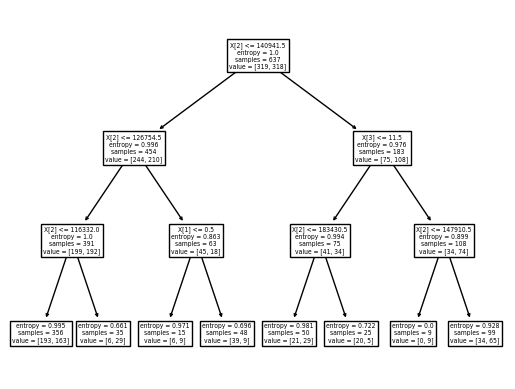

In [30]:
tree.plot_tree(model)

In [31]:
y_test.value_counts()

1    158
0    157
Name: Tax_income, dtype: int64

[Text(0.5, 0.875, 'City.Population <= 140941.5\nentropy = 1.0\nsamples = 637\nvalue = [319, 318]\nclass = 0'),
 Text(0.25, 0.625, 'City.Population <= 126754.5\nentropy = 0.996\nsamples = 454\nvalue = [244, 210]\nclass = 0'),
 Text(0.125, 0.375, 'City.Population <= 116332.0\nentropy = 1.0\nsamples = 391\nvalue = [199, 192]\nclass = 0'),
 Text(0.0625, 0.125, 'entropy = 0.995\nsamples = 356\nvalue = [193, 163]\nclass = 0'),
 Text(0.1875, 0.125, 'entropy = 0.661\nsamples = 35\nvalue = [6, 29]\nclass = 1'),
 Text(0.375, 0.375, 'Marital.Status <= 0.5\nentropy = 0.863\nsamples = 63\nvalue = [45, 18]\nclass = 0'),
 Text(0.3125, 0.125, 'entropy = 0.971\nsamples = 15\nvalue = [6, 9]\nclass = 1'),
 Text(0.4375, 0.125, 'entropy = 0.696\nsamples = 48\nvalue = [39, 9]\nclass = 0'),
 Text(0.75, 0.625, 'Work.Experience <= 11.5\nentropy = 0.976\nsamples = 183\nvalue = [75, 108]\nclass = 1'),
 Text(0.625, 0.375, 'City.Population <= 183430.5\nentropy = 0.994\nsamples = 75\nvalue = [41, 34]\nclass = 0'),


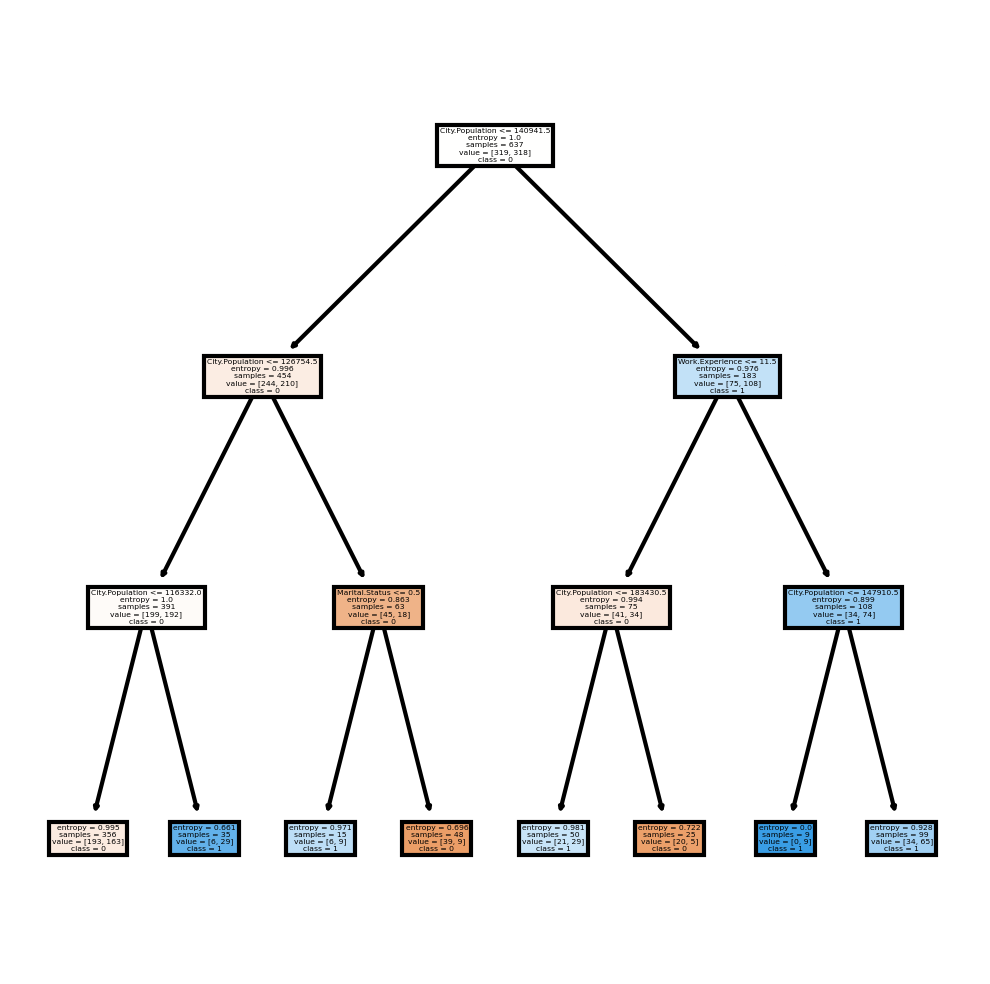

In [32]:
import matplotlib.pyplot as plt
fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [33]:
# prdicting on test data 
preds = model.predict(x_test)

In [34]:
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
# CrossTab 
pd.crosstab(y_test,preds)

col_0,0,1
Tax_income,,
0,116,41
1,114,44


In [36]:
model.score(x_train,y_train)

0.6169544740973313

In [37]:
# Accuracy 
import numpy as np
np.mean(preds==y_test)

0.5079365079365079

In [38]:
model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5446428571428571, 0.9, 'City.Population <= 140941.5\nentropy = 1.0\nsamples = 637\nvalue = [319, 318]\nclass = 0'),
 Text(0.2857142857142857, 0.7, 'City.Population <= 126754.5\nentropy = 0.996\nsamples = 454\nvalue = [244, 210]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'City.Population <= 116332.0\nentropy = 1.0\nsamples = 391\nvalue = [199, 192]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'City.Population <= 109693.5\nentropy = 0.995\nsamples = 356\nvalue = [193, 163]\nclass = 0'),
 Text(0.03571428571428571, 0.1, 'entropy = 1.0\nsamples = 316\nvalue = [162, 154]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.769\nsamples = 40\nvalue = [31, 9]\nclass = 0'),
 Text(0.21428571428571427, 0.3, 'Work.Experience <= 5.5\nentropy = 0.661\nsamples = 35\nvalue = [6, 29]\nclass = 1'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 Text(0.25, 0.1, 'entropy = 0.779\nsamples = 26\nvalue = [6, 20]\nclass = 1'),
 Text(0.4285714285714

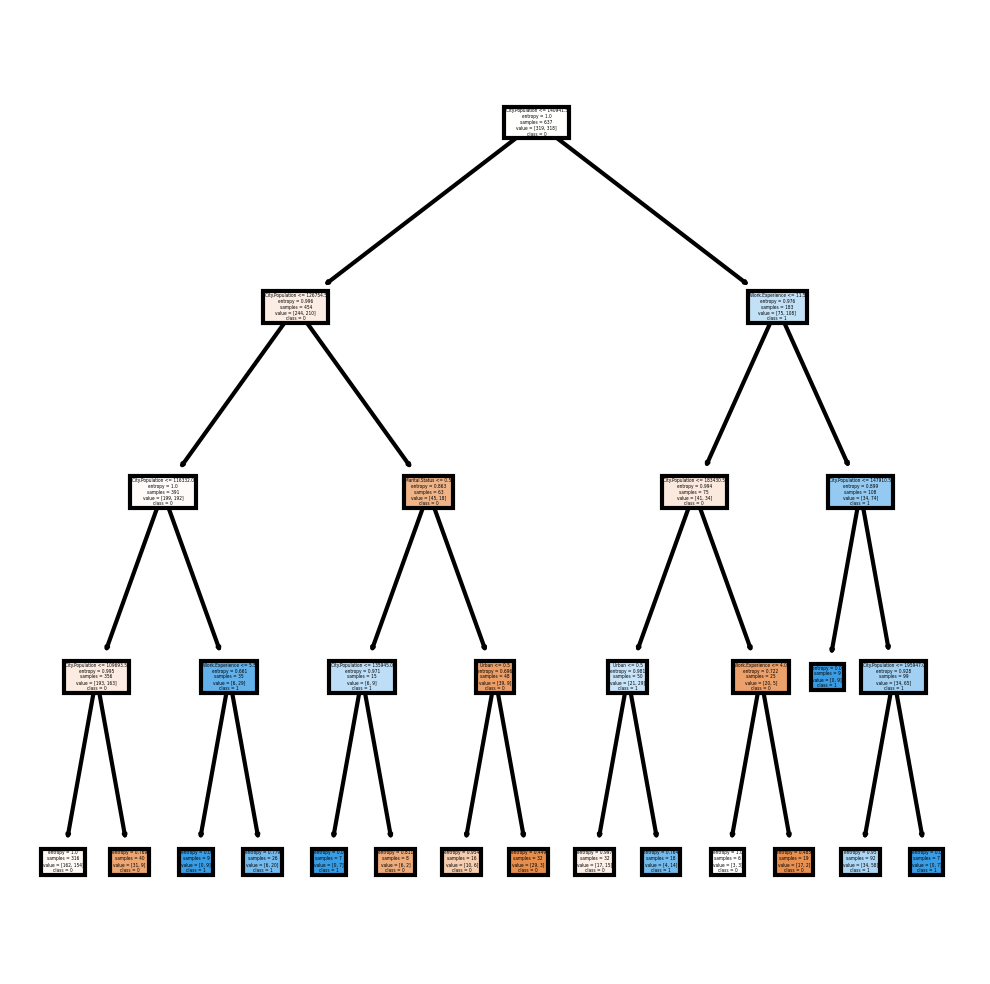

In [39]:
fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model_1,feature_names=fn,class_names=cn,filled=True)

In [40]:
preds_1 = model_1.predict(x_test)
preds_1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
pd.crosstab(y_test,preds_1)

col_0,0,1
Tax_income,,
0,127,30
1,118,40


In [42]:
model_1.score(x_train,y_train)

0.6263736263736264

In [43]:
np.mean(preds_1==y_test)

0.5301587301587302

In [44]:
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

[Text(0.5388888888888889, 0.9166666666666666, 'City.Population <= 140941.5\nentropy = 1.0\nsamples = 637\nvalue = [319, 318]\nclass = 0'),
 Text(0.25555555555555554, 0.75, 'City.Population <= 126754.5\nentropy = 0.996\nsamples = 454\nvalue = [244, 210]\nclass = 0'),
 Text(0.14444444444444443, 0.5833333333333334, 'City.Population <= 116332.0\nentropy = 1.0\nsamples = 391\nvalue = [199, 192]\nclass = 0'),
 Text(0.08888888888888889, 0.4166666666666667, 'City.Population <= 109693.5\nentropy = 0.995\nsamples = 356\nvalue = [193, 163]\nclass = 0'),
 Text(0.044444444444444446, 0.25, 'Work.Experience <= 13.5\nentropy = 1.0\nsamples = 316\nvalue = [162, 154]\nclass = 0'),
 Text(0.022222222222222223, 0.08333333333333333, 'entropy = 0.976\nsamples = 127\nvalue = [52, 75]\nclass = 1'),
 Text(0.06666666666666667, 0.08333333333333333, 'entropy = 0.981\nsamples = 189\nvalue = [110, 79]\nclass = 0'),
 Text(0.13333333333333333, 0.25, 'Marital.Status <= 1.5\nentropy = 0.769\nsamples = 40\nvalue = [31, 9

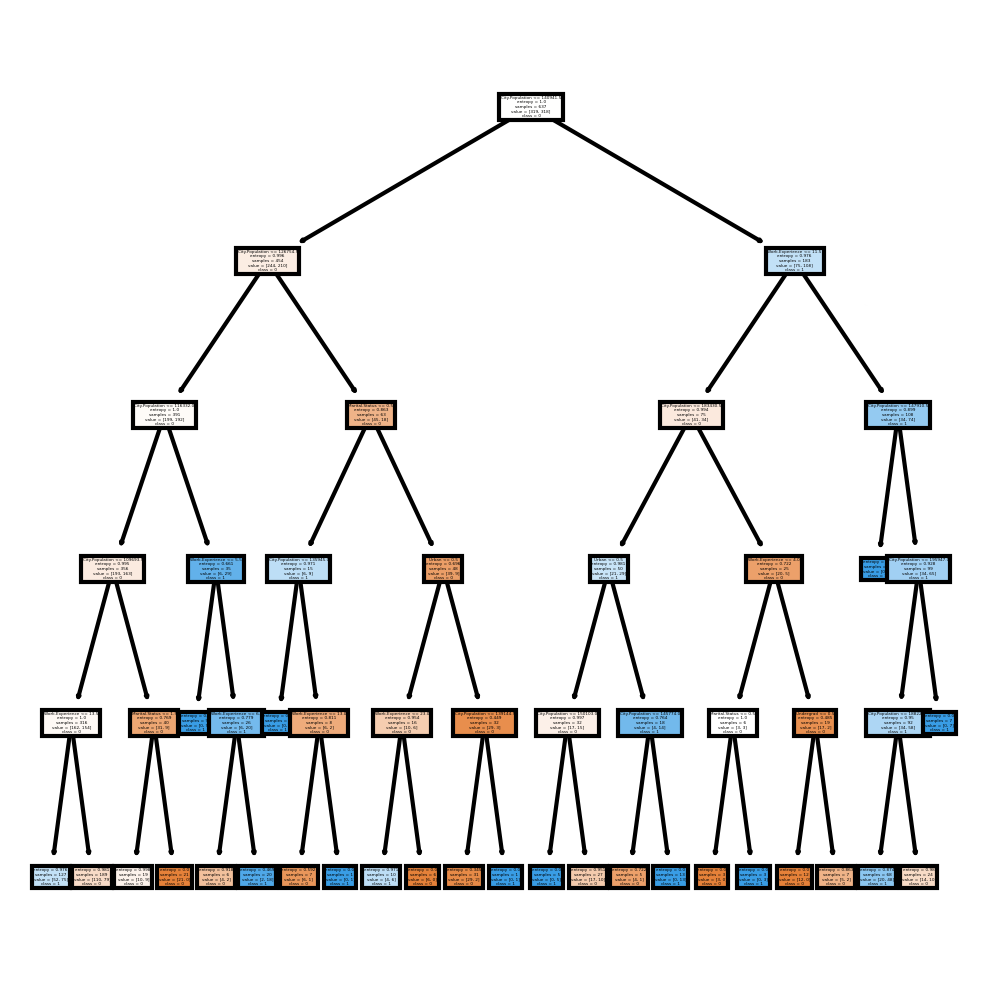

In [45]:
fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model_2,feature_names=fn,class_names=cn,filled=True)

In [46]:
preds_2= model_2.predict(x_test)
preds_2

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [47]:
model_2.score(x_train,y_train)

0.695447409733124

In [48]:
np.mean(preds_2==y_test)

0.5904761904761905

In [49]:
# Building decision tree classifier (CART) using Gini Criteria 
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [50]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
# Prediction and computing the accuracy 
pred_gini = model_gini.predict(x_test)

In [52]:
pred_gini

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
model_gini.score(x_train,y_train)

0.6169544740973313

In [54]:
np.mean(pred_gini==y_test)

0.5079365079365079

In [55]:
model_gini_1 = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)

In [56]:
model_gini_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [57]:
pred_gini_1 = model_gini_1.predict(x_test)
pred_gini_1

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [58]:
model_gini_1.score(x_train,y_train)

0.6452119309262166

In [59]:
np.mean(pred_gini_1==y_test)

0.5841269841269842

In [60]:
model_gini_2 = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)

In [61]:
model_gini_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

[Text(0.5651041666666666, 0.9166666666666666, 'City.Population <= 140941.5\ngini = 0.5\nsamples = 637\nvalue = [319, 318]\nclass = 0'),
 Text(0.296875, 0.75, 'City.Population <= 126754.5\ngini = 0.497\nsamples = 454\nvalue = [244, 210]\nclass = 0'),
 Text(0.16666666666666666, 0.5833333333333334, 'City.Population <= 116332.0\ngini = 0.5\nsamples = 391\nvalue = [199, 192]\nclass = 0'),
 Text(0.08333333333333333, 0.4166666666666667, 'City.Population <= 80947.5\ngini = 0.496\nsamples = 356\nvalue = [193, 163]\nclass = 0'),
 Text(0.041666666666666664, 0.25, 'Work.Experience <= 6.5\ngini = 0.498\nsamples = 210\nvalue = [99, 111]\nclass = 1'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.302\nsamples = 27\nvalue = [5, 22]\nclass = 1'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.5\nsamples = 183\nvalue = [94, 89]\nclass = 0'),
 Text(0.125, 0.25, 'Marital.Status <= 0.5\ngini = 0.459\nsamples = 146\nvalue = [94, 52]\nclass = 0'),
 Text(0.10416666666666667, 0.08333333333333333, 'g

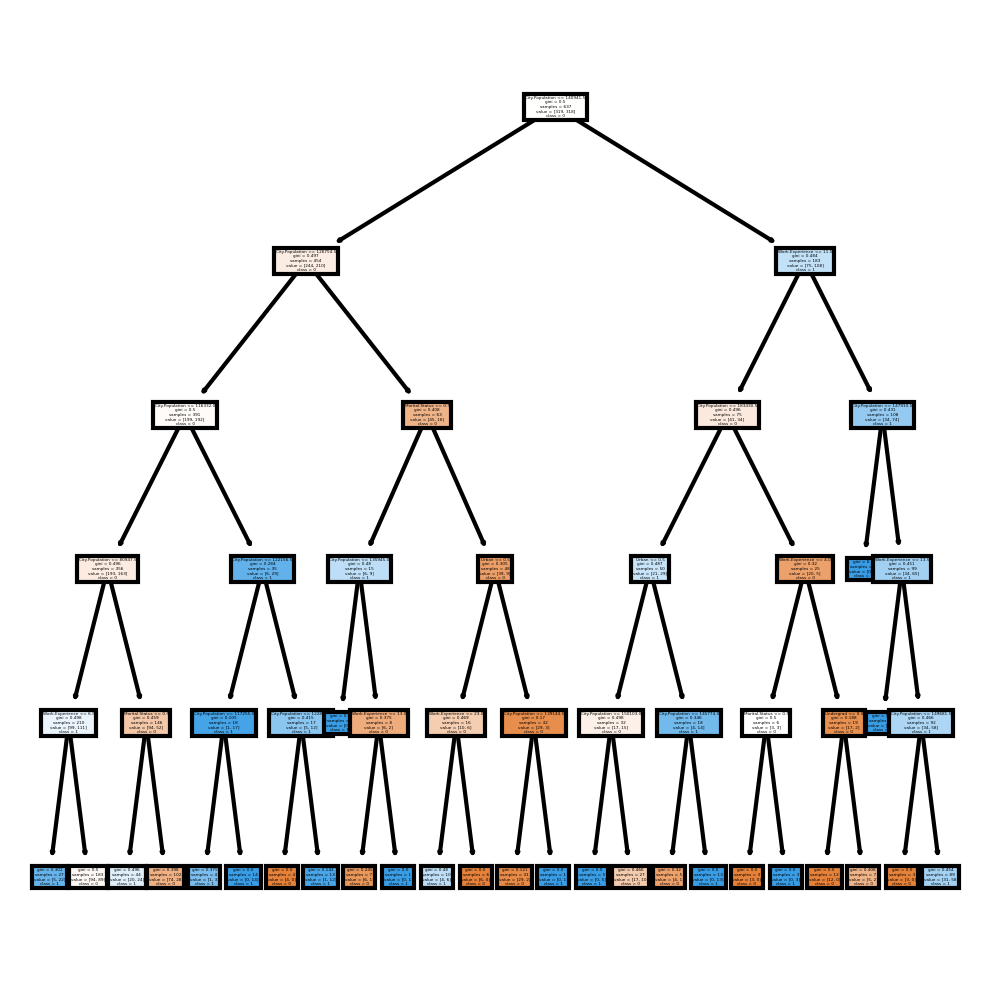

In [62]:
fn = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model_gini_2,feature_names=fn,class_names=cn,filled=True)

In [63]:
pred_gini_2 = model_gini_2.predict(x_test)

In [64]:
pred_gini_2

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [65]:
model_gini_2.score(x_train,y_train)

0.6938775510204082

In [66]:
np.mean(pred_gini_2==y_test)

0.5682539682539682